
# YouTube Engagement Analyzer: Enhancing Content Strategy Through Data

## Project Description:

In this data science and machine learning project, we will delve into the vast world of YouTube content to analyze user engagement, and recommend personalized video suggestions. Leveraging a comprehensive YouTube statistics dataset from Kaggle, our goal is to provide content creators and marketers with actionable insights to optimize their strategies and boost their channel's performance.

- **Engagement Analysis:** We will analyze metrics such as subscribers, rank, uploads, and views to identify patterns and trends.

**Data Visualization:** Create informative data visualizations and interactive dashboards to present our findings in an engaging and comprehensible manner.

1. **Content Creator Profiling:**
   - Use the 'subscribers' and 'video views' columns to identify top content creators.
   - Group creators by category and country to understand the diversity of content on YouTube.


2. **Performance Metrics Analysis:**
   - Analyze 'subscribers,' 'video views,' and 'uploads' to identify trends and patterns in channel growth.
   - Create visualizations to represent changes over time.


3. **Monetization Insights:**
   - Utilize 'lowest_monthly_earnings' and 'highest_monthly_earnings' to analyze the earnings potential of content creators.
   - Identify factors that contribute to higher earnings.


4. **Audience Engagement and Demographics:**
   - Explore 'Country' and 'Urban_population' to understand the geographic distribution of viewers.
   - Analyze 'Gross tertiary education enrollment (%)' to assess the education level of the audience.


5. **Predictive Modeling:**
   - Build predictive models using historical data to forecast metrics like 'subscribers' and 'video views.'
   - Evaluate the accuracy of the models and make recommendations based on predictions.

By the end of this project, we aim to empower YouTube content creators and marketers with data-driven strategies to enhance user engagement, improve content quality, and give insight on statistical analysis of the last 10 years.

## Features:



rank: Position of the YouTube channel based on the number of subscribers

Youtuber: Name of the YouTube channel

subscribers: Number of subscribers to the channel

video views: Total views across all videos on the channel

category: Category or niche of the channel

Title: Title of the YouTube channel

uploads: Total number of videos uploaded on the channel

Country: Country where the YouTube channel originates

Abbreviation: Abbreviation of the country

channel_type: Type of the YouTube channel (e.g., individual, brand)

video_views_rank: Ranking of the channel based on total video views

country_rank: Ranking of the channel based on the number of subscribers within its country

channel_type_rank: Ranking of the channel based on its type (individual or brand)

video_views_for_the_last_30_days: Total video views in the last 30 days

lowest_monthly_earnings: Lowest estimated monthly earnings from the channel

highest_monthly_earnings: Highest estimated monthly earnings from the channel

lowest_yearly_earnings: Lowest estimated yearly earnings from the channel

highest_yearly_earnings: Highest estimated yearly earnings from the channel

subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days

created_year: Year when the YouTube channel was created

created_month: Month when the YouTube channel was created

created_date: Exact date of the YouTube channel's creation

Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country

Population: Total population of the country

Unemployment rate: Unemployment rate in the country

Urban_population: Percentage of the population living in urban areas

Latitude: Latitude coordinate of the country's location

Longitude: Longitude coordinate of the country's location



## Data Description

Global Youtube Statistica.csv - Kaggle dataset 2023

## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data 

In [39]:
data = pd.read_csv("Global YouTube Statistics.csv", encoding='ISO-8859-1')

# Data Preprocessing

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [41]:
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [42]:
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [43]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [44]:
data.duplicated().sum()

0

In [45]:
current_year = dt.datetime.now().year

# Calculate the year 10 years ago
ten_years_ago = current_year - 10

# Filter the data for the past 10 years
data = data[data['created_year'] >= ten_years_ago]

# You can verify the filtered data
print(data[['created_year']].head(10))

    created_year
5         2013.0
6         2015.0
8         2016.0
9         2018.0
10        2014.0
12        2013.0
13        2016.0
16        2020.0
24        2013.0
27        2018.0


In [46]:
# Convert column names to lowercase
data.columns = data.columns.str.lower()

# Convert column names to snake_case
data.columns = data.columns.str.replace(' ', '_')

# Convert video views from scientific notation to regular notation
data['video_views'] = data['video_views'].apply(lambda x: '{:.0f}'.format(x))

# Rename the 'Gross tertiary education enrollment (%)' column
data = data.rename(columns={'gross_tertiary_education_enrollment_(%)': 'education_enrollment'})

# Convert 'video_views' to numeric
data['video_views'] = pd.to_numeric(data['video_views'], errors='coerce')

# Drop missing values
data.dropna(inplace=True)

print(data.head())
data.columns

    rank                               youtuber  subscribers  video_views  \
8      9                            Like Nastya    106000000  90479060027   
9     10                          Vlad and Niki     98900000  77180169894   
10    11                      Zee Music Company     96700000  57856289381   
13    14                              BLACKPINK     89800000  32144597566   
24    25  ChuChu TV Nursery Rhymes & Kids Songs     65900000  45757850229   

          category                                  title  uploads  \
8   People & Blogs                       Like Nastya Vlog      493   
9    Entertainment                          Vlad and Niki      574   
10           Music                      Zee Music Company     8548   
13  People & Blogs                              BLACKPINK      543   
24       Education  ChuChu TV Nursery Rhymes & Kids Songs      633   

          country abbreviation   channel_type  ...  \
8          Russia           RU         People  ...   
9   Unit

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date', 'education_enrollment',
       'population', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')

In [47]:
# Change the data type of 'created_year' to integer
data['created_year'] = data['created_year'].astype(int)

# Define a mapping dictionary for month names to numeric values
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Map the 'created_month' column
data['created_month'] = data['created_month'].map(month_mapping)
print(data.head())


    rank                               youtuber  subscribers  video_views  \
8      9                            Like Nastya    106000000  90479060027   
9     10                          Vlad and Niki     98900000  77180169894   
10    11                      Zee Music Company     96700000  57856289381   
13    14                              BLACKPINK     89800000  32144597566   
24    25  ChuChu TV Nursery Rhymes & Kids Songs     65900000  45757850229   

          category                                  title  uploads  \
8   People & Blogs                       Like Nastya Vlog      493   
9    Entertainment                          Vlad and Niki      574   
10           Music                      Zee Music Company     8548   
13  People & Blogs                              BLACKPINK      543   
24       Education  ChuChu TV Nursery Rhymes & Kids Songs      633   

          country abbreviation   channel_type  ...  \
8          Russia           RU         People  ...   
9   Unit

In [48]:
# Filter data to include only the last 10 years

# Get the current year
current_year = dt.datetime.now().year

# Calculate the year 10 years ago
ten_years_ago = current_year - 10

# Filter the entire DataFrame for the past 10 years
data = data[data['created_year'] >= ten_years_ago]

print(data.head())


    rank                               youtuber  subscribers  video_views  \
8      9                            Like Nastya    106000000  90479060027   
9     10                          Vlad and Niki     98900000  77180169894   
10    11                      Zee Music Company     96700000  57856289381   
13    14                              BLACKPINK     89800000  32144597566   
24    25  ChuChu TV Nursery Rhymes & Kids Songs     65900000  45757850229   

          category                                  title  uploads  \
8   People & Blogs                       Like Nastya Vlog      493   
9    Entertainment                          Vlad and Niki      574   
10           Music                      Zee Music Company     8548   
13  People & Blogs                              BLACKPINK      543   
24       Education  ChuChu TV Nursery Rhymes & Kids Songs      633   

          country abbreviation   channel_type  ...  \
8          Russia           RU         People  ...   
9   Unit

https://stackoverflow.com/questions/29849445/convert-scientific-notation-to-decimals

date created, earnings, country created, (regional differences)
consistency 
recommend similar channels based on a feature

tableau dashboard

## 1 Content Creator Profiling

description

In [49]:
# Profiling content creators by category
category_profile = data.groupby('category')['subscribers'].sum().reset_index()
category_profile = category_profile.sort_values(by='subscribers', ascending=False)

# Profiling content creators by country
country_profile = data.groupby('country')['subscribers'].sum().reset_index()
country_profile = country_profile.sort_values(by='subscribers', ascending=False)

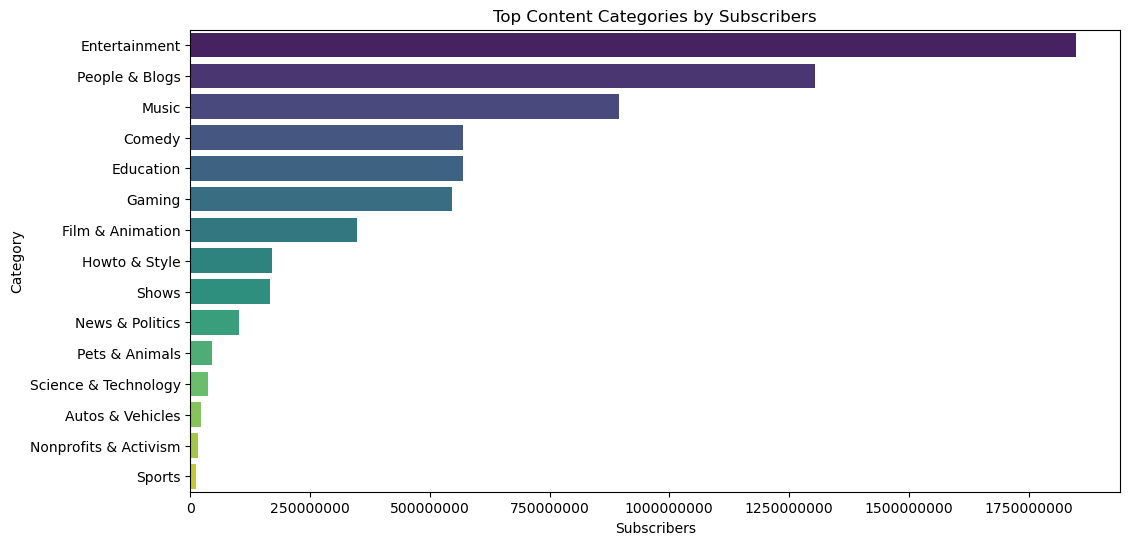

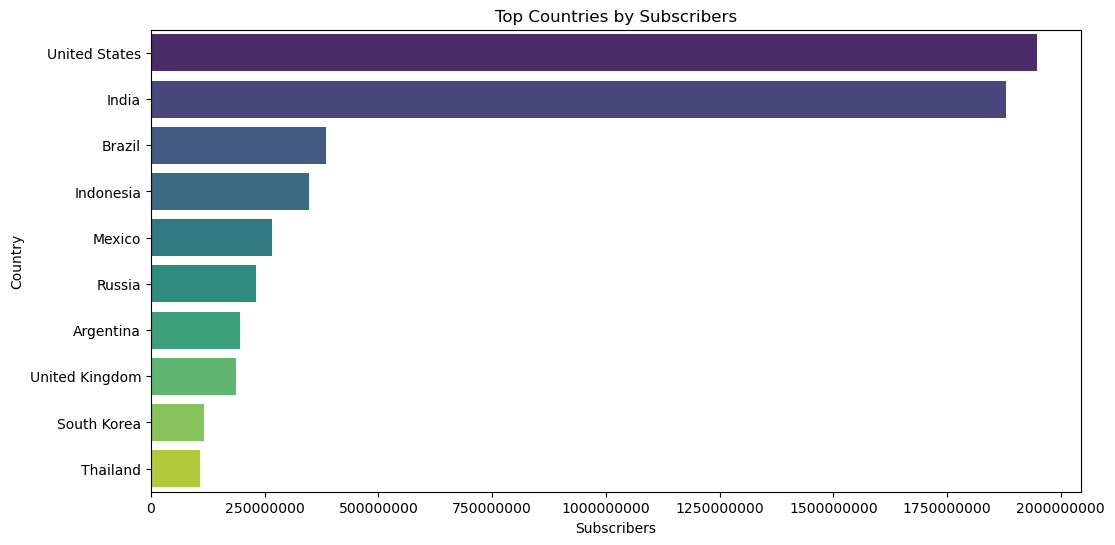

In [50]:
# Plot the top content categories by subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='category', data=category_profile, palette='viridis')
plt.title('Top Content Categories by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Category')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

# Plot the top countries by subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='country', data=country_profile.head(10), palette='viridis')
plt.title('Top Countries by Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Country')
plt.ticklabel_format(style='plain', axis='x')

plt.show()


The above graphs show that the top content categories are Entertainment, Music, and People & Blogs. The top countries are the United States, India, and Brazil. This gives us a good idea of the type of content that is popular on YouTube and where the content creators are located.

In [51]:
# Profiling content creators by category
category_profile = data.groupby('category')['subscribers'].sum().reset_index()
category_profile = category_profile.sort_values(by='subscribers', ascending=False)

# Profiling content creators by country
country_profile = data.groupby('country')['subscribers'].sum().reset_index()
country_profile = country_profile.sort_values(by='subscribers', ascending=False)

print("Top Content Categories by Subscribers:")
print(category_profile.head())

print("\nTop Countries by Subscribers:")
print(country_profile.head())


Top Content Categories by Subscribers:
          category  subscribers
3    Entertainment   1849100000
10  People & Blogs   1303700000
7            Music    895400000
1           Comedy    569900000
2        Education    569800000

Top Countries by Subscribers:
          country  subscribers
30  United States   1946800000
11          India   1879100000
2          Brazil    383800000
12      Indonesia    348300000
17         Mexico    266500000


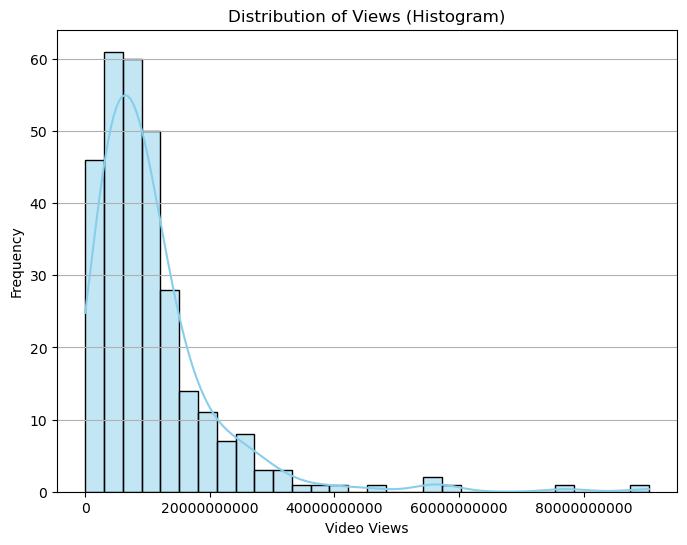

In [52]:
# Create a histogram for the distribution of 'video_views'
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='video_views', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Views (Histogram)')
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.ticklabel_format(style='plain', axis='x')

plt.show()


In the distrubution of views, we can see that most of the videos have less than 1 million views. There are a few videos that have more than 1 million views, but they are very few in number. We can assume that most of the videos are not very popular, but there are a few videos that are very popular. The distribution is right-skewed, and the mean is greater than the median. The frequency of videos decreases as the number of views increases.

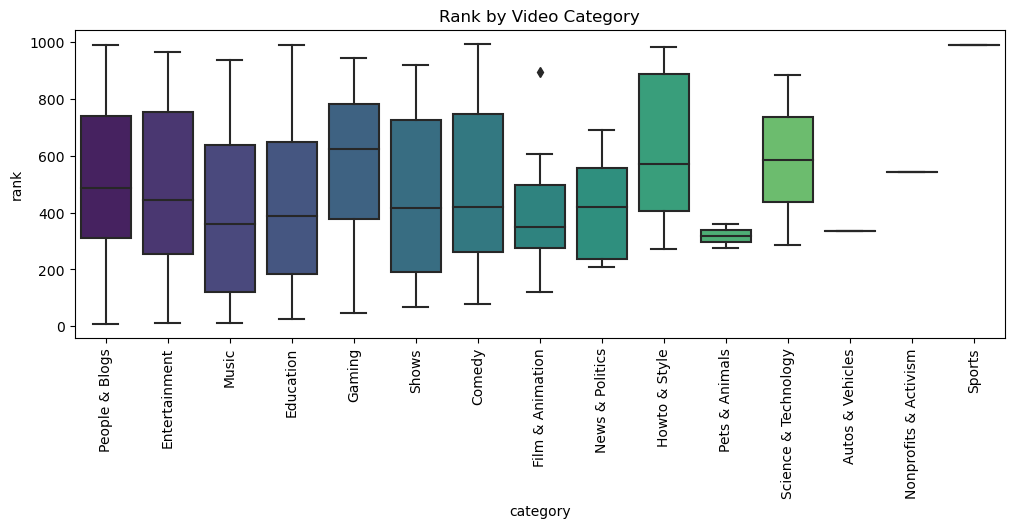

In [53]:

plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='category', y='rank', palette='viridis')
plt.title('Rank by Video Category')
plt.xticks(rotation=90)
plt.show()


The rank is a measure of a video's popularity within its category. In the context of this boxplot, a lower rank indicates higher relative popularity within the category. When we examine the boxplot, we observe that the median rank for 'Entertainment' videos is higher than that of other categories. This suggests that, on average, videos in the 'Entertainment' category have lower relative popularity within their category. To clarify, a higher rank corresponds to a lower number of subscribers, and the 'Entertainment' category, with its higher median rank, tends to have videos with fewer subscribers compared to other categories.

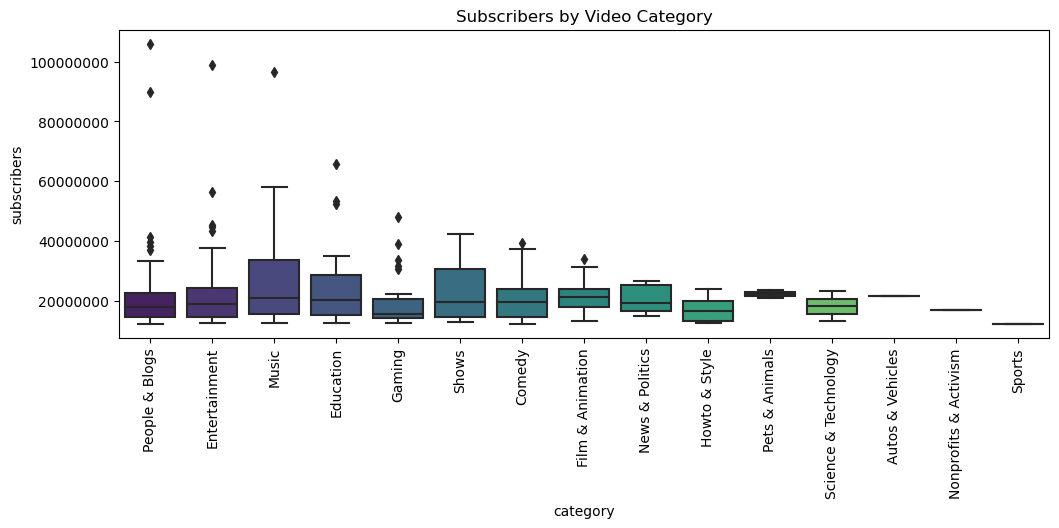

In [54]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='category', y='subscribers', palette='viridis')
plt.title('Subscribers by Video Category')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')

plt.show()


This boxplot compares the number of subscribers for each video category. The boxplot shows that the median number of subscribers is highest for the 'Music' category, followed by 'Entertainment' and 'People & Blogs'. There are outliers in the 'Music' category, which indicates that there are a few channels with a very high number of subscribers. Outliers are also common in a few other categories.

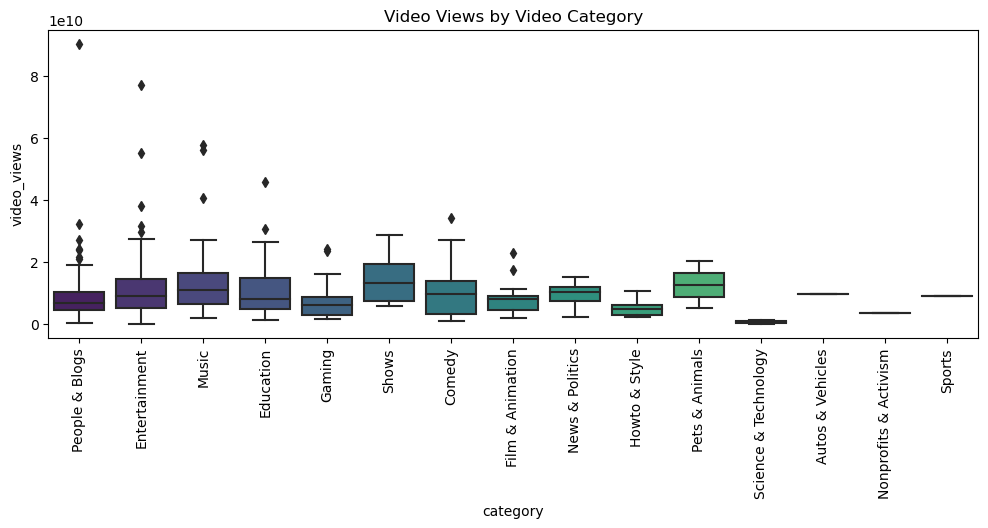

In [55]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='category', y='video_views', palette='viridis')
plt.title('Video Views by Video Category')
plt.xticks(rotation=90)
plt.show()


Comparing the performance of content creators in video views and category, we again see many outliers The top categories by subscribers are Music, Entertainment, Education, Shows, and Comedy.

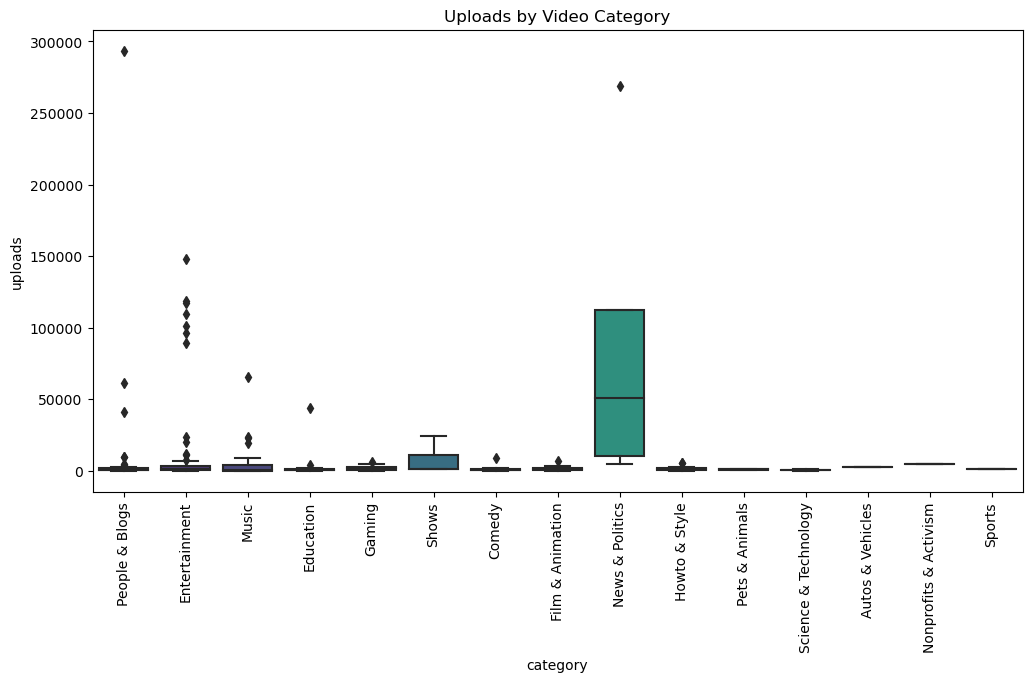

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='category', y='uploads', palette='viridis')
plt.title('Uploads by Video Category')
plt.xticks(rotation=90)
plt.show()


When looking at the distribution of uploads by category, we can see that the most outliers for the Entertainment category. This is followed by the Music, and People & Blogs category. The mosyt uploads and highest median is in the News & Politics category which far surpasses any other category with many more uploads.

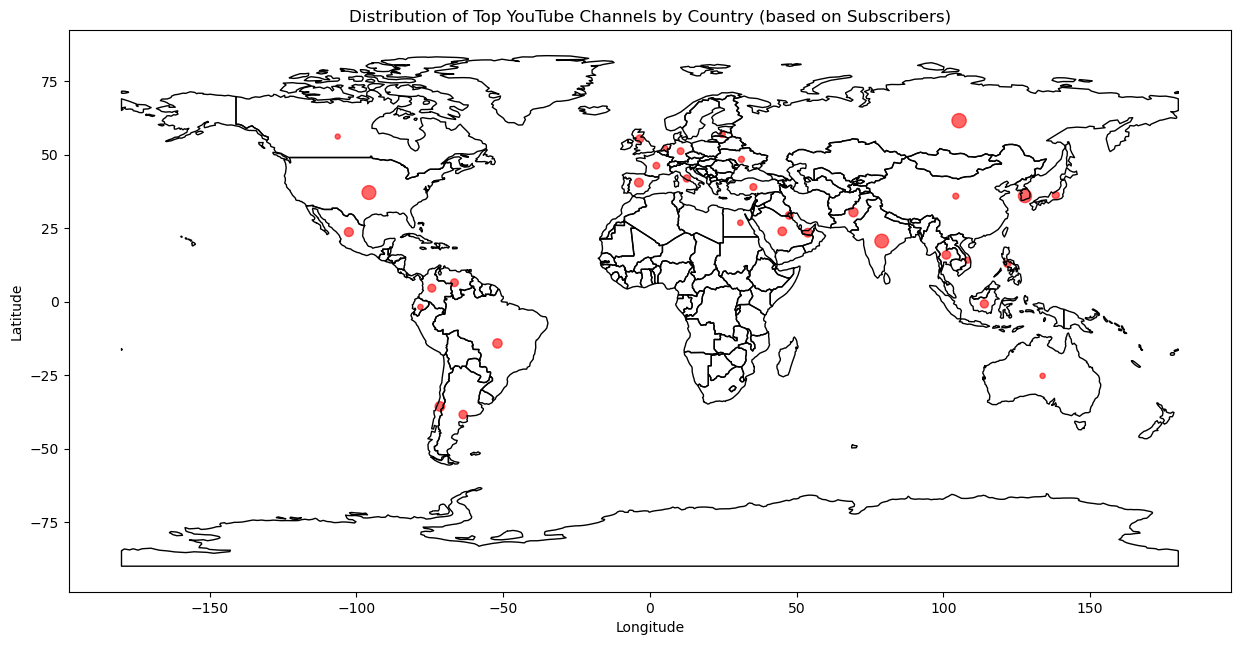

In [57]:
top_creators_per_country = data.groupby('country').apply(lambda x: x.nlargest(1,'subscribers')).reset_index(drop=True)
top_creators_per_country = top_creators_per_country.sort_values(by='subscribers', ascending=False)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig,ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1, color='black')
ax.scatter(top_creators_per_country['longitude'],top_creators_per_country['latitude'], s=top_creators_per_country['subscribers'] / 1000000, color='red', alpha=0.6)
ax.set_title("Distribution of Top YouTube Channels by Country (based on Subscribers)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()



The Distrubution of Top YouTube Channels by Country (based on Subscribers) can be seen in the image above as a world map, the size of the circles represent the number of subscribers. 

In [58]:


columns=['video_views','uploads','subscribers','highest_yearly_earnings']
for column in columns:
    youtube_1 = data[data['country'] != 'Unknown']

    average_views = youtube_1 .groupby('country')[column].mean().reset_index()
    
    fig = px.choropleth(average_views, 
                    locations="country", 
                    locationmode='country names', 
                    color=column, 
                    hover_name="country",
                    color_continuous_scale=px.colors.sequential.thermal ,
                    title="Average {} by Country".format(str(column)))

    fig.show()



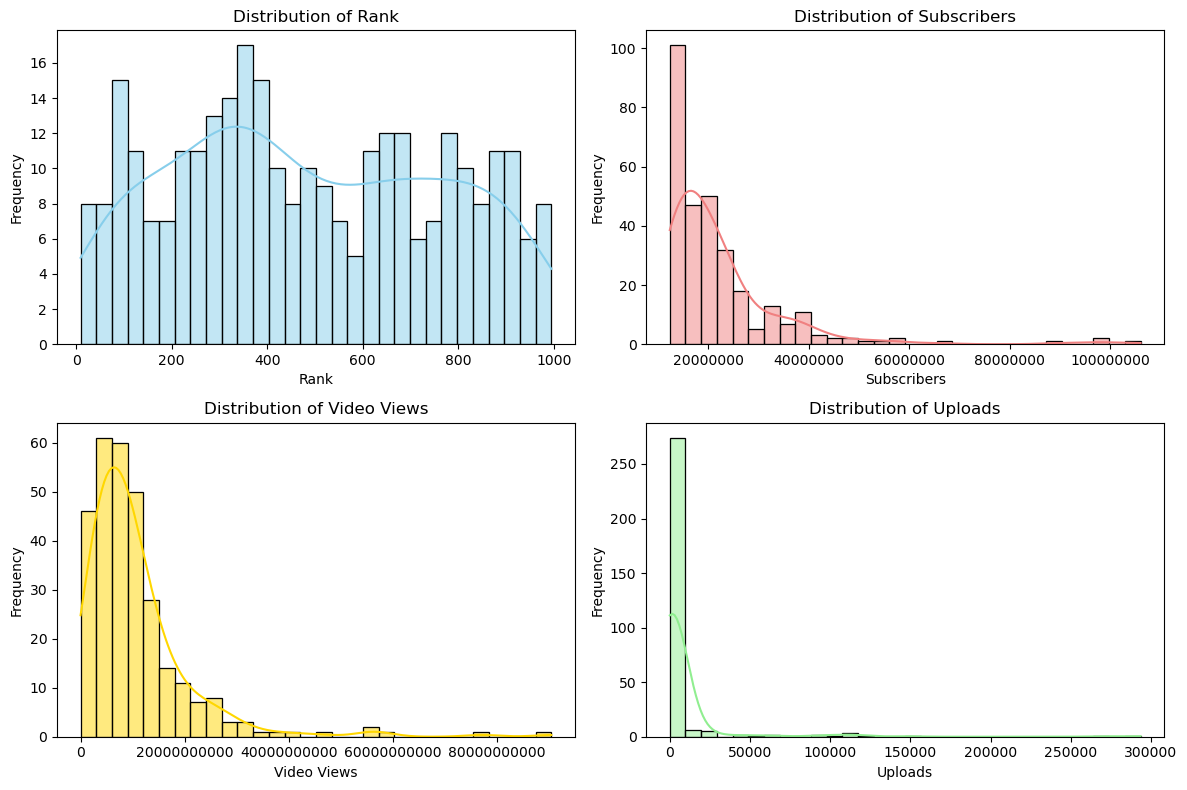

In [59]:
# Set the figure size and create subplots
plt.figure(figsize=(12, 8))

# Create the first histogram
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first plot
sns.histplot(data=data, x='rank', kde=True, color='skyblue', bins=30)
plt.title('Distribution of Rank')
plt.xlabel('Rank')
plt.ylabel('Frequency')

# Create the second histogram
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second plot
sns.histplot(data=data, x='subscribers', kde=True, color='lightcoral', bins=30)
plt.title('Distribution of Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')

# Create the third histogram
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third plot
sns.histplot(data=data, x='video_views', kde=True, color='gold', bins=30)
plt.title('Distribution of Video Views')
plt.xlabel('Video Views')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')


# Create the fourth histogram
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth plot
sns.histplot(data=data, x='uploads', kde=True, color='lightgreen', bins=30)
plt.title('Distribution of Uploads')
plt.xlabel('Uploads')
plt.ylabel('Frequency')
# Adjust the layout
plt.tight_layout()

# Show the histograms
plt.show()


The above subplots show the distribution of the following variables: rank, subscribers, video views, and uploads. The distribution of rank is more evenly distributed, which means that most channels have a high rank. The distribution of subscribers is skewed to the right, which means that most channels have a low number of subscribers. The distribution of video views is also skewed to the right, which means that most channels have a low number of video views. The distribution of uploads is also skewed to the right, which means that most channels have a low number of uploads. 

## 2. Performance Metrics Analysis

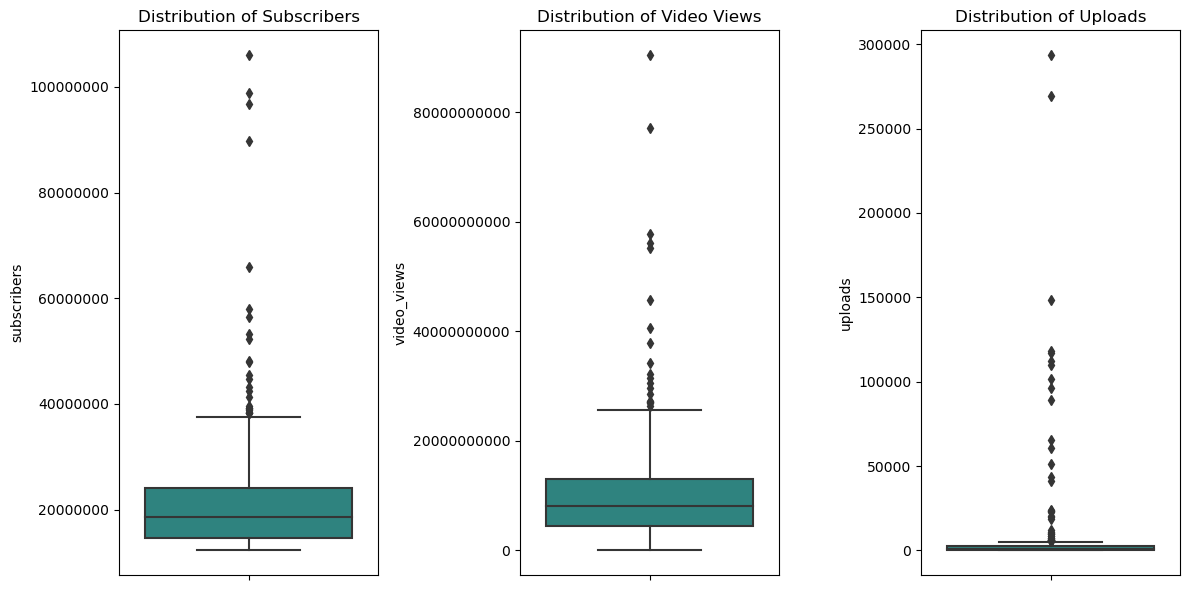

In [60]:
# Convert the 'video_views' column to numeric (if not already)
data['video_views'] = pd.to_numeric(data['video_views'], errors='coerce')

# Visualize the distribution of subscribers, video views, and uploads
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y='subscribers', data=data, palette='viridis')
plt.title('Distribution of Subscribers')
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(1, 3, 2)
sns.boxplot(y='video_views', data=data, palette='viridis')
plt.title('Distribution of Video Views')
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(1, 3, 3)
sns.boxplot(y='uploads', data=data, palette='viridis')
plt.title('Distribution of Uploads')

plt.tight_layout()

plt.show()


## 3. Monezitation Insights

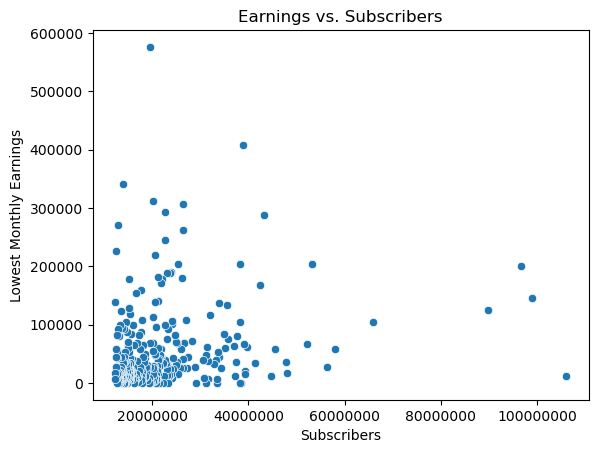

In [61]:
# Analyze earnings and their relationship with subscribers
earnings_vs_subscribers = sns.scatterplot(x='subscribers', y='lowest_monthly_earnings', data=data, palette='viridis')
plt.title('Earnings vs. Subscribers')
plt.xlabel('Subscribers')
plt.ylabel('Lowest Monthly Earnings')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

When looking at Earnings vs. Subscribers, we can see that there is a positive relationship between the two variables. As the number of subscribers increases, the earnings also increase. However, there are some outliers in the data. For example, there are some channels with a high number of subscribers but low earnings. This could be due to the fact that the channel is new and has not yet started earning money. There are also some channels with a low number of subscribers but high earnings. This could be due to the fact that the channel is old and has already earned a lot of money. Overall, there is a trend in that most subribers are below 40 milliuon and below 100,000 in earnings.

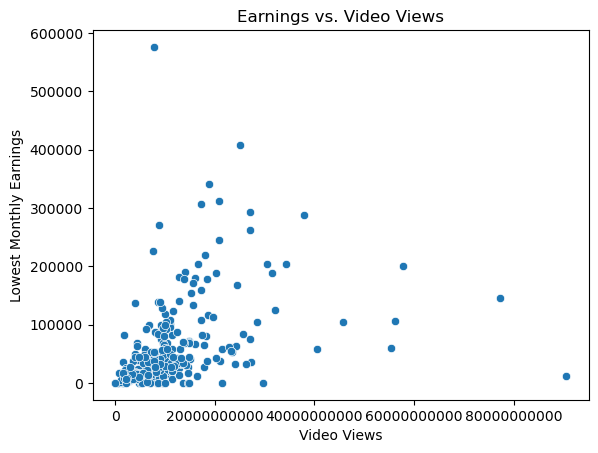

In [62]:
# Analyze earnings and their relationship with video views
earnings_vs_video_views = sns.scatterplot(x='video_views', y='lowest_monthly_earnings', data=data, palette='viridis')
plt.title('Earnings vs. Video Views')
plt.xlabel('Video Views')
plt.ylabel('Lowest Monthly Earnings')
plt.ticklabel_format(style='plain', axis='x')

plt.show()


Analysis of Earnings and Video Views for top creators, find that there is a positive correlation between the two variables. As video views increase, earnings also increase. This makes sense because the more views a video gets, the more ads are shown, and the more money the content creator makes.

## 3.1 Earnings by channel type

In [63]:
# Group the data by channel type and calculate the mean of the lowest and highest monthly earnings
earnings_by_channel_type = data.groupby('channel_type')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean().reset_index()
earnings_by_channel_type = earnings_by_channel_type.melt(id_vars='channel_type', value_vars=['lowest_monthly_earnings', 'highest_monthly_earnings'], var_name='earnings_type', value_name='earnings')

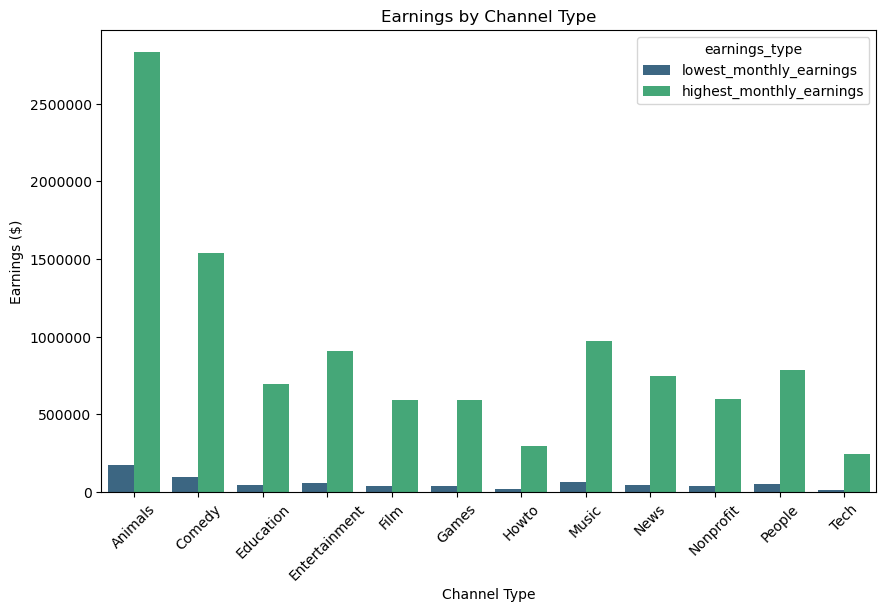

In [64]:
# Visualize earnings by channel type
plt.figure(figsize=(10, 6))
sns.barplot(x='channel_type', y='earnings', hue='earnings_type', data=earnings_by_channel_type, palette='viridis')
plt.title('Earnings by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Earnings ($)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

When looking at Earnings by Channel Type, we can see that the highest monthly earnings are from the Animals category. This is followed by the Comedy category. The lowest monthly earnings are from the Tech & Howto category. This is inciteful for people decided what type of content to create on YouTube, and which will yield the highest earnings.

## 4 Audience Engagement and Demographics

In [65]:
# Explore audience engagement (subscribers) by country
subscribers_by_country = data.groupby('country')['subscribers'].mean().reset_index()
subscribers_by_country = subscribers_by_country.sort_values(by='subscribers', ascending=False)

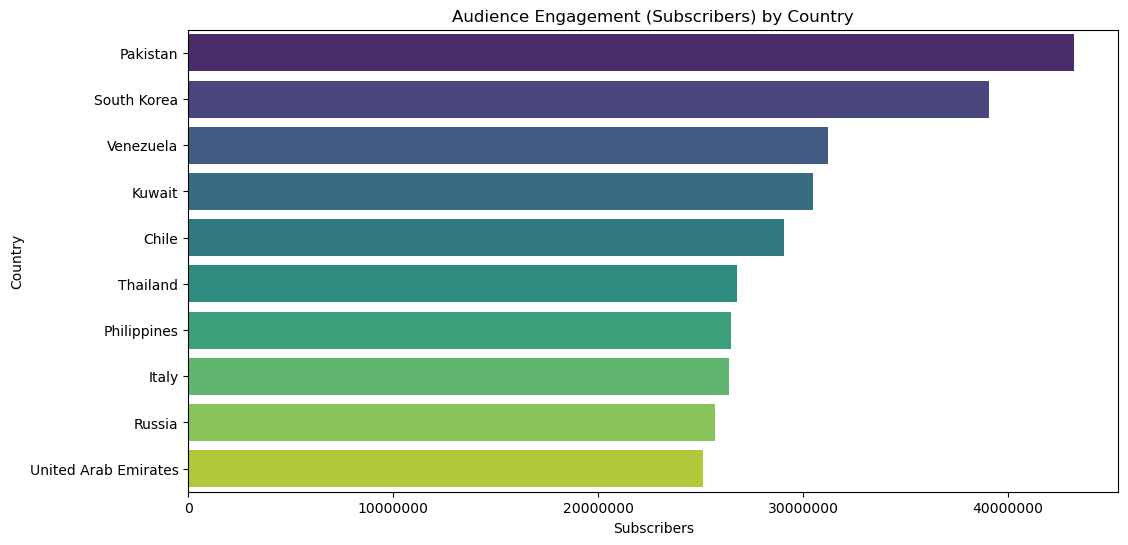

In [66]:
# Visualize audience engagement by country
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='country', data=subscribers_by_country.head(10), palette='viridis')
plt.title('Audience Engagement (Subscribers) by Country')
plt.xlabel('Subscribers')
plt.ylabel('Country')
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [72]:
top_10_countries = subscribers_by_country.head(10)

top_10_countries['subscribers'] = top_10_countries['subscribers'].apply(lambda x: '{:.0f}'.format(x))

# Print the top 10 countries
print(top_10_countries)


                 country subscribers
19              Pakistan    43200000
23           South Korea    39066667
31             Venezuela    31200000
15                Kuwait    30500000
4                  Chile    29066667
25              Thailand    26750000
20           Philippines    26500000
13                 Italy    26400000
21                Russia    25688889
28  United Arab Emirates    25100000


The list demonstrates that popular YouTube channels with a significant number of subscribers are not limited to a single country. They have a global audience, as these channels are located in various countries, including Pakistan, South Korea, Venezuela, Kuwait, Chile, Thailand, the Philippines, Italy, Russia, and the United Arab Emirates.

Some countries on the list, like Pakistan, Venezuela, and the United Arab Emirates, are considered emerging markets in terms of digital content creation. This indicates that YouTube's influence is not limited to developed nations, and creators from emerging markets can also achieve a global reach. The presence of these channels in different countries suggests that the content they produce is likely diverse and may cater to various languages, cultures, and interests. 

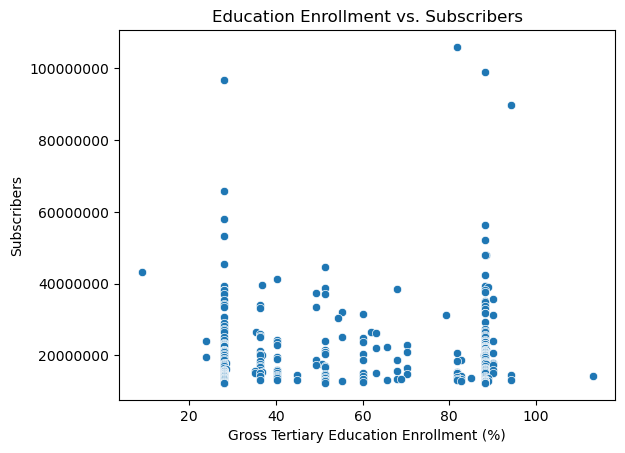

In [73]:

# Explore education enrollment and its relationship with subscribers
education_vs_subscribers = sns.scatterplot(x='education_enrollment', y='subscribers', data=data, palette='viridis')
plt.title('Education Enrollment vs. Subscribers')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Subscribers')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

The scatterplot visualizes the relationship between the percentage of gross tertiary education enrollment and the number of subscribers for YouTube content creators. This analysis aims to understand if there is any observable connection between the level of education enrollment in a country and the popularity of YouTube channels within that country.

No Strong Linear Relationship, it is evident that there is no strong linear relationship between education enrollment and the number of subscribers. The data points are scattered across the plot, and there is no clear upward or downward trend. This suggests that education enrollment alone is not a strong predictor of a channel's subscriber count.

The data points appear to cluster in various regions of the plot. While some channels from countries with high education enrollment have a substantial number of subscribers.

There are noticeable outliers in the plot, representing channels with exceptionally high subscriber counts regardless of the education enrollment rate in their respective countries. These outliers may be driven by unique content, effective marketing strategies, or other external factors.

## 5. Predictive Modeling

In [74]:
# Prepare data for predictive modeling
X = data[['uploads', 'video_views', 'rank']]
y = data['subscribers']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 48106712378906.414


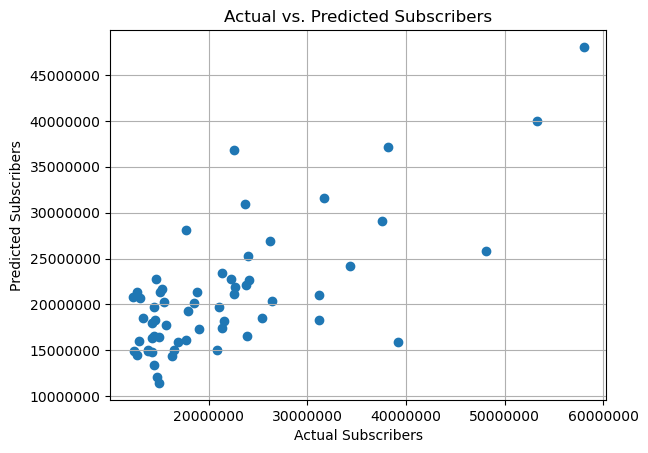

In [76]:
# Visualize actual vs. predicted subscribers
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Subscribers")
plt.ylabel("Predicted Subscribers")
plt.title("Actual vs. Predicted Subscribers")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.show()
